# 03_02.Support Vector Machine(분류)


## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#  *** 런타임 다시 시작

In [1]:
## 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

## 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

## 3.데이터 전처리
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline                    # 불균형데이터 처리를 위한 pipeline 수정
# from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# 4. 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE                  # 불균형데이터 처리로 수정

## 5.모델구축
# from sklearn.svm import SVR # 서포트 벡터 머신(SVM)(예측)
from sklearn.svm import SVC # 서포트 벡터 머신(SVM)(분류)

## 6.모델검정
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import ConfusionMatrixDisplay # 그래프 그리기기
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score  # 정확도, 민감도 등
from sklearn.metrics import roc_curve, auc # ROC 곡선 그리기

# 7.최적화
from sklearn.model_selection import GridSearchCV # 하이퍼파라미터 튜닝

## 2.데이터 불러오기

### 2.1 구글 드라이브와 연결

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2.2 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [3]:
breast_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/유방암진단.csv', encoding="cp949")
breast_df.head()

,id,진단,반지름,질감,주변부,크기,평활도,조밀성,오목,대칭,프랙탈
0,1,1,18.0,10.4,122.8,1001.0,0.118,0.278,0.300,0.242,0.079
1,2,1,20.6,17.8,132.9,1326.0,0.085,0.079,0.087,0.181,0.057
2,3,1,19.7,21.3,130.0,1203.0,0.110,0.160,0.197,0.207,0.060
3,4,0,13.5,14.4,87.5,566.3,0.098,0.081,0.067,0.189,0.058
4,5,0,13.1,15.7,85.6,520.0,0.108,0.127,0.046,0.197,0.068


### 2.3 자료구조 살펴보기

In [ ]:
breast_df.shape

In [ ]:
breast_df.info()

In [ ]:
breast_df.columns

## 3.데이터 전처리

### 3.1 필요없는 변수 제거

In [4]:
breast_df = breast_df.drop (['id'], axis=1)
breast_df.head()

,진단,반지름,질감,주변부,크기,평활도,조밀성,오목,대칭,프랙탈
0,1,18.0,10.4,122.8,1001.0,0.118,0.278,0.300,0.242,0.079
1,1,20.6,17.8,132.9,1326.0,0.085,0.079,0.087,0.181,0.057
2,1,19.7,21.3,130.0,1203.0,0.110,0.160,0.197,0.207,0.060
3,0,13.5,14.4,87.5,566.3,0.098,0.081,0.067,0.189,0.058
4,0,13.1,15.7,85.6,520.0,0.108,0.127,0.046,0.197,0.068


### 3.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [5]:
breast_df['진단'] = breast_df['진단'].replace ([1,0], ['악성','양성'])  # 중요한 변수를 앞으로 변경

breast_df.head()

,진단,반지름,질감,주변부,크기,평활도,조밀성,오목,대칭,프랙탈
0,악성,18.0,10.4,122.8,1001.0,0.118,0.278,0.300,0.242,0.079
1,악성,20.6,17.8,132.9,1326.0,0.085,0.079,0.087,0.181,0.057
2,악성,19.7,21.3,130.0,1203.0,0.110,0.160,0.197,0.207,0.060
3,양성,13.5,14.4,87.5,566.3,0.098,0.081,0.067,0.189,0.058
4,양성,13.1,15.7,85.6,520.0,0.108,0.127,0.046,0.197,0.068


In [ ]:
breast_df.info()

## 4.데이터 탐색

### 4.1 EDA 데이터 탐색

In [ ]:
# 수치형 변수
breast_df.describe().round(2).T

In [ ]:
# 그룹별 분석
breast_df.groupby('진단').mean()

In [ ]:
# 범주형 변수
# lecture_df.columns
categorical_features=['진단']

for col in categorical_features:
    cat = breast_df[col].value_counts()
    print(cat)

### 4.2 그래프 그리기

In [ ]:
# 한글 폰트 인식
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 수치형 변수
g = sns.pairplot(breast_df,
                 hue="진단",
                 markers=["o", "s"])

In [ ]:
# 범주형 변수
for col in categorical_features:
    sns.countplot(x=col, data = breast_df)
    plt.show()

### 4.3 base accuracy


In [ ]:
# base accuracy
breast_df['진단'].value_counts()

In [ ]:
breast_df['진단'].value_counts()/breast_df.shape[0]

## 5.훈련/테스트용 데이터 분할


### 5.1 data와 target으로 분리
- data: X, target: y 로 분리

- X 추출


In [6]:
X = breast_df.drop (['진단'], axis=1)
X.head()

,반지름,질감,주변부,크기,평활도,조밀성,오목,대칭,프랙탈
0,18.0,10.4,122.8,1001.0,0.118,0.278,0.300,0.242,0.079
1,20.6,17.8,132.9,1326.0,0.085,0.079,0.087,0.181,0.057
2,19.7,21.3,130.0,1203.0,0.110,0.160,0.197,0.207,0.060
3,13.5,14.4,87.5,566.3,0.098,0.081,0.067,0.189,0.058
4,13.1,15.7,85.6,520.0,0.108,0.127,0.046,0.197,0.068


- target(y) 추출
- y 값을 series에서 배열로 변환

In [7]:
y = breast_df['진단']
y.head()

0    악성
1    악성
2    악성
3    양성
4    양성
Name: 진단, dtype: object

In [8]:
# y 값을 배열로 변환
# 악성 -> 0, 양성 -> 1로 변경됨

class_le = LabelEncoder()
y = class_le.fit_transform(y)
y

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,

### 5.2 훈련용 및 테스트용 데이터 분할
- test_size: 검증데이터 30%
- random_state : random seed 번호 = 1
- stratify : y(클래스)의 비율에 따라 분할(분류모형일때 사용)

In [9]:
# \ 이후에 space 없어야 함
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 1,
                                                    stratify = y)        # stratify(분류모형일때 사용)

In [ ]:
X_train.info()

In [ ]:
np.bincount(y_train)

In [ ]:
X_test.info()

In [ ]:
np.bincount(y_test)

## 6.pipeline으로 데이터 전처리
https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
- R에서 recipe
- 범주형 변수: OneHotEncoder
- 수치형 변수:
- 선형모델은 StandardScaler 로 표준화
- tree형 모델은 데이터 원형 사용

### 6.1 preprocess 세팅

In [ ]:
# from imblearn.pipeline import Pipeline
# 불균형데이터 처리를 위해 from sklearn.pipeline-> from imblearn.pipeline

In [10]:
# pipeline으로 세팅
# 수치형 변수(y는 제외)
numeric_features = ['반지름', '질감', '주변부', '크기', '평활도', '조밀성', '오목', '대칭', '프랙탈']

numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')), # 누락된 값은 중앙값으로 처리
        ('scaler', StandardScaler())
    ]
)

# 범주형 변수(y는 제외)
categorical_features=[]

categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant',
                                  fill_value='missing')),  # 누락된 값은 missing으로 상수 처리
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# preprocessor로 데이터 변환 세팅
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [11]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['반지름', '질감', '주변부', '크기', '평활도', '조밀성', '오목',
                                  '대칭', '프랙탈']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [])])

### 6.2 데이터 전처리 결과 확인
- https://www.kaggle.com/code/thomasswain/titanic-classifier

In [12]:
pd.DataFrame(preprocessor.fit_transform(X_train)).head()

,0,1,2,3,4,5,6,7,8
0,-0.377192,-0.436613,-0.364480,-0.414277,-1.207938,-0.311324,-0.212350,-0.923909,-0.698111
1,-1.768867,1.403965,-1.747517,-1.302799,-1.137325,-1.056841,-1.099694,0.197615,1.403672
2,-0.786508,-1.471938,-0.793970,-0.738675,0.063105,-0.553617,-0.703987,-0.176226,0.002483
3,-0.868372,-0.597664,-0.845194,-0.778585,0.769240,-0.516341,-0.739960,-0.400531,0.002483
4,-0.186178,-1.149837,-0.191108,-0.257876,0.063105,-0.460428,-0.296288,0.272384,-0.698111


## 7.모델만들기 (모델 설정)
- R에서 workflow
- 예측모델: 000_reg
- 분류모델: 000_clf

### 7.1 pipeline으로 모델 연결

In [13]:
#from imblearn.over_sampling import SMOTE                  # 불균형데이터 처리로 수정

svc_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ('smote', SMOTE(sampling_strategy = 0.75)),
        ("svc_clf", SVC(probability = True))               # svc_reg --> svc_clf, probability=True
    ]
)

svc_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['반지름', '질감', '주변부', '크기',
                                                   '평활도', '조밀성', '오목', '대칭',
                                                   '프랙탈']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('smote', SMOTE(sampling_strategy=0.75)),
                ('svc_clf', SVC(probability=True))])

### 7.2 하이퍼파라미터 세팅
- 그리드 서치를 사용한 머신 러닝 모델 세부 튜닝
- 기계학습 모델의 성능을 결정하는 하이퍼 파라미터 튜닝

In [15]:
svc_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'smote', 'svc_clf', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__imputer', 'preprocessor__num__scaler', 'preprocessor__num__imputer__add_indicator', 'preprocessor__num__imputer__copy', 'preprocessor__num__imputer__fill_value', 'preprocessor__num__imputer__keep_empty_features', 'preprocessor__num__imputer__missing_values', 'preprocessor__num__imputer__strategy', 'preprocessor__num__imputer__verbose', 'preprocessor__num__scaler__copy', 'preprocessor__num__scaler__with_mean', 'preprocessor__num__scaler__with_std', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 'preprocessor__cat__verbose', 'preprocessor__

In [17]:
svc_grid = {
    "svc_clf__kernel" : ["rbf", "linear"] ,
    'svc_clf__C': [0.1, 1, 10, 20],
    'svc_clf__gamma': [1, 0.1, 0.01, 0.001],
}

svc_grid

{'svc_clf__kernel': ['rbf', 'linear'],
 'svc_clf__C': [0.1, 1, 10, 20],
 'svc_clf__gamma': [1, 0.1, 0.01, 0.001]}

### 7.3 하이퍼파라미터 그리드 만들기

In [18]:
svc_gs = GridSearchCV(estimator = svc_pipe,
                       param_grid = svc_grid,
                       scoring='roc_auc',             # roc_auc
                       cv = 10,
                       n_jobs = -1,
                       verbose = 10,              # 프로세스 진행사항 확인
                       return_train_score = True) # 훈련결과 저장

## 8.모델 훈련(모델 학습)
- machine learning

### 8.1 모델 훈련하기(learning)

In [19]:
svc_gs.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['반지름',
                                                                          '질감',
                                                                          '주변부',
                                                                          '크기',
                                                                          '평활도',
                                                                          '조밀성',
                                                                          '오목',
                                                                          '대칭',
                                                                          '프랙탈']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         [])])),
                                       ('smote', SMOTE(sampling_strategy=0.75)),
                                       ('svc_clf', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svc_clf__C': [0.1, 1, 10, 20],
                         'svc_clf__gamma': [1, 0.1, 0.01, 0.001],
                         'svc_clf__kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='roc_auc', verbose=10)

### 8.2 검증 곡선으로 Tuning 결과 확인
- 결과 표로 정리: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html#sphx-glr-auto-examples-model-selection-plot-grid-search-stats-py
- 그래프로 정리: https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv

In [20]:
# 결과확인
svc_gs.cv_results_

{'mean_fit_time': array([0.07038555, 0.02179158, 0.03935697, 0.02116416, 0.04863179,
        0.0197032 , 0.05341821, 0.0212981 , 0.06162145, 0.02158699,
        0.02641046, 0.02506394, 0.02904263, 0.02198668, 0.04873364,
        0.02515123, 0.0676882 , 0.02925501, 0.02683427, 0.04711854,
        0.02490287, 0.03201156, 0.03081963, 0.03458602, 0.10403438,
        0.08987546, 0.04903126, 0.08108196, 0.0411737 , 0.06997318,
        0.04115949, 0.06674829]),
 'std_fit_time': array([0.02049623, 0.00316797, 0.00344291, 0.00312066, 0.00498479,
        0.0009547 , 0.00224504, 0.00298206, 0.00297663, 0.00224139,
        0.00212013, 0.00545291, 0.00112421, 0.0019129 , 0.01143223,
        0.00385642, 0.01021739, 0.00322457, 0.00362406, 0.02049272,
        0.0030929 , 0.00366193, 0.0028724 , 0.01137355, 0.02171232,
        0.02162571, 0.0058858 , 0.01409981, 0.00423436, 0.01798237,
        0.01306342, 0.00868407]),
 'mean_score_time': array([0.00825553, 0.00564101, 0.00550601, 0.00490174, 0.005832

In [21]:
# 분석결과를 표로 정리
results_df = pd.DataFrame(svc_gs.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
10,"{'svc_clf__C': 1, 'svc_clf__gamma': 0.1, 'svc_...",1,0.996400,0.003675
28,"{'svc_clf__C': 20, 'svc_clf__gamma': 0.01, 'sv...",2,0.995924,0.005518
20,"{'svc_clf__C': 10, 'svc_clf__gamma': 0.01, 'sv...",3,0.995314,0.005016
12,"{'svc_clf__C': 1, 'svc_clf__gamma': 0.01, 'svc...",4,0.994514,0.007002
23,"{'svc_clf__C': 10, 'svc_clf__gamma': 0.001, 's...",5,0.994457,0.005021
30,"{'svc_clf__C': 20, 'svc_clf__gamma': 0.001, 's...",6,0.994305,0.005492
1,"{'svc_clf__C': 0.1, 'svc_clf__gamma': 1, 'svc_...",7,0.994267,0.005170
31,"{'svc_clf__C': 20, 'svc_clf__gamma': 0.001, 's...",8,0.994190,0.005478
22,"{'svc_clf__C': 10, 'svc_clf__gamma': 0.001, 's...",9,0.994019,0.006519
5,"{'svc_clf__C': 0.1, 'svc_clf__gamma': 0.01, 's...",10,0.993962,0.006255


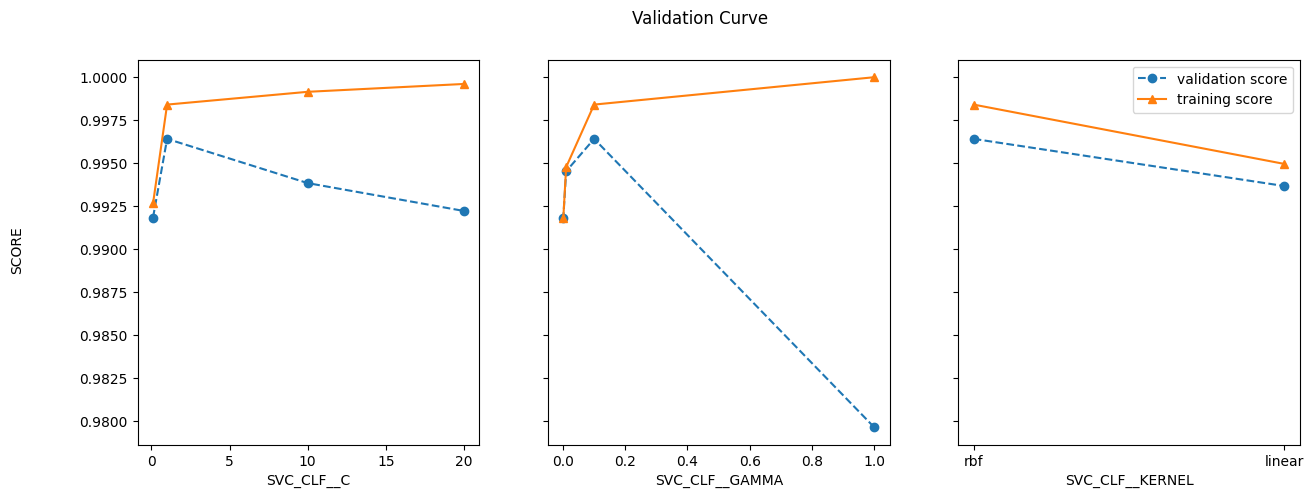

In [22]:
# 튜닝결과 그래프
results = svc_gs.cv_results_
means_test = results['mean_test_score']
means_train = results['mean_train_score']

masks = []
masks_names = list(svc_gs.best_params_.keys())
for p_k, p_v in svc_gs.best_params_.items():
    masks.append(list(results['param_'+p_k].data==p_v))

params = svc_gs.param_grid

fig, ax = plt.subplots(1,len(params),
                       sharex='none',
                       sharey='all',
                       figsize=(15,5))
fig.suptitle('Validation Curve')
fig.text(0.04, 0.5, 'SCORE', va='center', rotation='vertical')
pram_preformace_in_best = {}

for i, p in enumerate(masks_names):
    m = np.stack(masks[:i] + masks[i+1:])
    pram_preformace_in_best
    best_parms_mask = m.all(axis=0)
    best_index = np.where(best_parms_mask)[0]
    x = np.array(params[p])
    y_1 = np.array(means_test[best_index])
    y_2 = np.array(means_train[best_index])
    ax[i].errorbar(x, y_1, linestyle='--', marker='o', label='validation score')
    ax[i].errorbar(x, y_2, linestyle='-', marker='^',label='training score' )
    ax[i].set_xlabel(p.upper())

plt.legend()
plt.show()

### 8.3 best 모델 설정

In [23]:
# best 모델 파라미터 확인
print(svc_gs.best_score_)
print(svc_gs.best_params_)

0.9964000000000001
{'svc_clf__C': 1, 'svc_clf__gamma': 0.1, 'svc_clf__kernel': 'rbf'}


In [24]:
# best 모델 파라미터를 최종모델로 훈련
best_clf = svc_gs.best_estimator_
best_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['반지름', '질감', '주변부', '크기',
                                                   '평활도', '조밀성', '오목', '대칭',
                                                   '프랙탈']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('smote', SMOTE(sampling_strategy=0.75)),
                ('svc_clf', SVC(C=1, gamma=0.1, probability=True))])

In [25]:
print(best_clf['svc_clf'])

SVC(C=1, gamma=0.1, probability=True)


### 8.4 중요변수확인

In [ ]:
# 중요도 점수 계산
# linear만 계수 추출됨. rbf는 중요도 점수 출력 안됨

feature = best_clf['preprocessor'].get_feature_names_out()    # 수정
importances = best_clf["svc_clf"].coef_                        # 수정
importances = importances.flatten()                           # flatten() - 다차원 array를 1차원 array로 변환
output = pd.DataFrame([feature , importances],
                      index = ["feature","importances"]).T
# output = output[output.importances > 0]
output.sort_values(["importances"],
                   ascending = True ,                         #ascending = True
                   inplace = True)

In [ ]:
# 그래프 그리기

plt.rc('font', family='NanumBarunGothic')

fig ,ax = plt.subplots(figsize=(10, 5))
sns.set(font_scale = 1)
ax = sns.barplot(y="feature", x="importances", data=output)
plt.show()

## 9.모델 test 및 검정

### 9.1 검증용 데이터로 예측
- predict_proba (확률값으로 표시): 분류모델에서 사용
- predict (class로 표시)

In [26]:
y_pred = best_clf.predict_proba(X_test)
y_pred

array([[9.99288422e-01, 7.11577933e-04],
       [4.83567858e-01, 5.16432142e-01],
       [1.17047329e-02, 9.88295267e-01],
       [9.94306372e-01, 5.69362812e-03],
       [5.00000000e-01, 5.00000000e-01],
       [2.76971994e-02, 9.72302801e-01],
       [9.10676388e-06, 9.99990893e-01],
       [9.96030782e-01, 3.96921785e-03],
       [1.63816826e-06, 9.99998362e-01],
       [9.92267729e-01, 7.73227088e-03],
       [9.97764570e-01, 2.23543033e-03],
       [9.99311189e-01, 6.88810711e-04],
       [1.69313209e-05, 9.99983069e-01],
       [7.98751103e-01, 2.01248897e-01],
       [8.62843252e-03, 9.91371567e-01],
       [1.70656769e-07, 9.99999829e-01],
       [9.99051451e-01, 9.48549119e-04],
       [3.61986628e-03, 9.96380134e-01],
       [9.99763390e-01, 2.36610212e-04],
       [9.99389434e-01, 6.10565743e-04],
       [8.87493796e-08, 9.99999911e-01],
       [9.35462021e-07, 9.99999065e-01],
       [7.07890505e-08, 9.99999929e-01],
       [1.19281845e-06, 9.99998807e-01],
       [9.998042

In [ ]:
y_pred = best_clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0])

### 9.2 정오분류표 검정

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = best_clf.classes_)
cm

array([[ 55,   8],
       [  6, 101]])

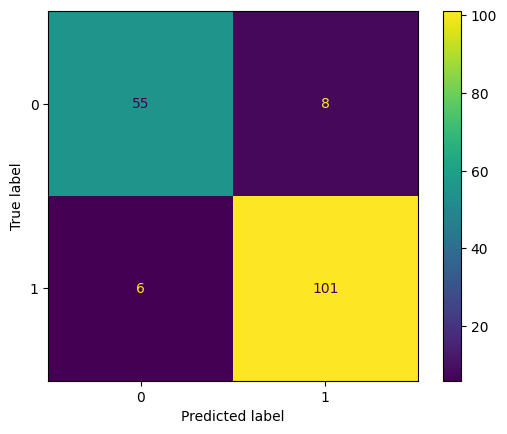

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_clf.classes_)
disp.plot()
plt.show()

### 9.3 모델 검정

In [ ]:
## 6.모델검정
#from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
#from sklearn.metrics import ConfusionMatrixDisplay # 그래프 그리기기
#from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score  # 정확도, 민감도 등
#from sklearn.metrics import roc_curve, auc # ROC 곡선 그리기

In [ ]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        63
           1       0.93      0.94      0.94       107

    accuracy                           0.92       170
   macro avg       0.91      0.91      0.91       170
weighted avg       0.92      0.92      0.92       170



In [ ]:
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())
print('roc_auc: %.3f' % roc_auc_score(y_test, y_pred))
print('정확도: %.3f' % accuracy_score(y_test, y_pred))
print('정밀도: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('재현율: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

잘못 분류된 샘플 개수: 14
roc_auc: 0.908
정확도: 0.918
정밀도: 0.927
재현율: 0.944
F1: 0.935


### 9.4 ROC 곡선 그리기

In [ ]:
# fpr, tpr, thresholds = roc_curve(y_test, best_clf.decision_function(X_test))
fpr, tpr, thresholds = roc_curve(y_test, best_clf.predict_proba(X_test)[:, 1])

In [ ]:
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.01587302, 0.01587302,
        0.03174603, 0.03174603, 0.04761905, 0.04761905, 0.06349206,
        0.06349206, 0.11111111, 0.11111111, 0.12698413, 0.12698413,
        0.15873016, 0.15873016, 0.23809524, 0.23809524, 0.28571429,
        0.28571429, 1.        ]),
 array([0.        , 0.00934579, 0.69158879, 0.69158879, 0.8317757 ,
        0.8317757 , 0.87850467, 0.87850467, 0.91588785, 0.91588785,
        0.92523364, 0.92523364, 0.94392523, 0.94392523, 0.95327103,
        0.95327103, 0.98130841, 0.98130841, 0.99065421, 0.99065421,
        1.        , 1.        ]),
 array([1.99969297e+00, 9.99692973e-01, 9.52404536e-01, 9.48361415e-01,
        8.98314108e-01, 8.95887396e-01, 8.59884072e-01, 8.47053929e-01,
        7.90426823e-01, 7.83302229e-01, 7.60267039e-01, 6.02297571e-01,
        5.52057471e-01, 5.03685538e-01, 4.62624153e-01, 4.17123955e-01,
        3.51445218e-01, 1.34060153e-01, 1.16686077e-01, 1.00211278e-01,
        9.72009570e-02, 1.36

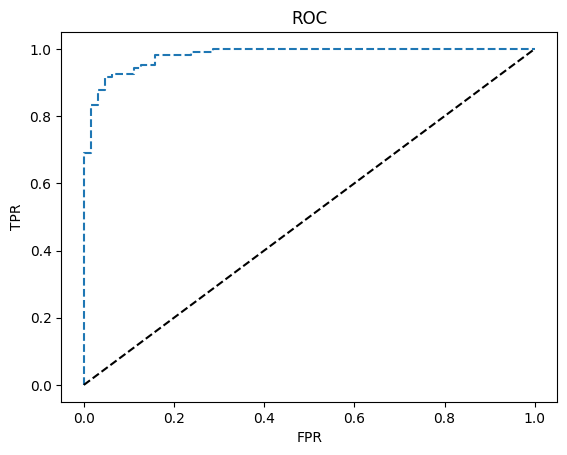

In [ ]:
plt.plot(fpr, tpr, '--', label="Support Vector Machine")     # 수정
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

### 9.5 gain and lift chart
- scikit-plot 설치 및 사용
- https://scikit-plot.readthedocs.io/en/stable/metrics.html
- pip install scikit-plot

In [ ]:
pip install scikit-plot

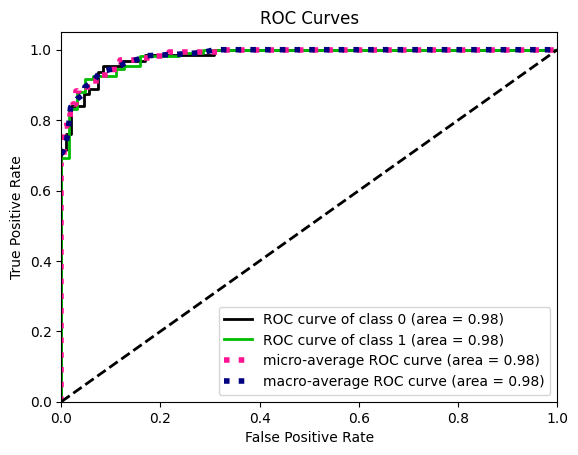

In [ ]:
# ROC_ACU Cruve
import scikitplot as skplt
skplt.metrics.plot_roc(y_test,
                       best_clf.predict_proba(X_test))
plt.show()

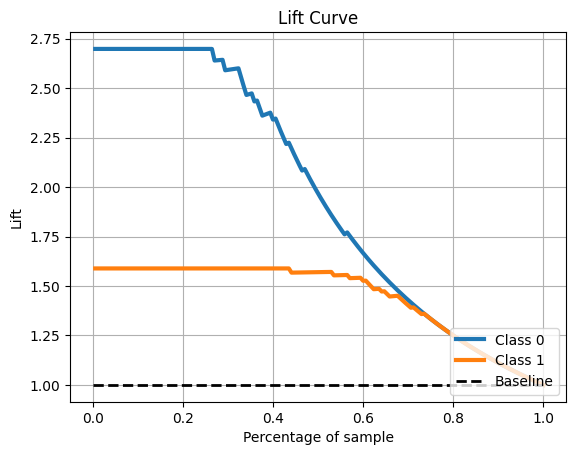

In [ ]:
# lift Chart
skplt.metrics.plot_lift_curve(y_test,
                              best_clf.predict_proba(X_test))
plt.show()

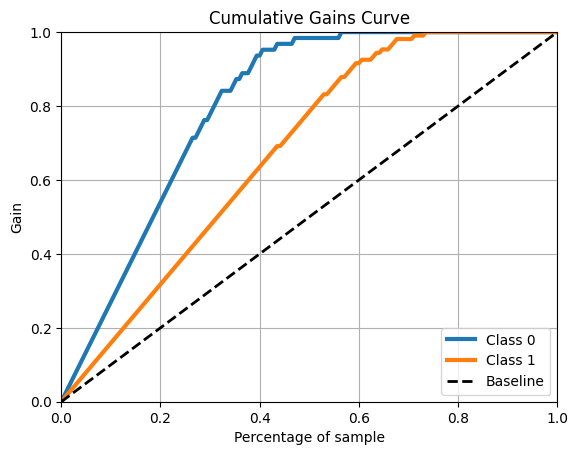

In [ ]:
# gain Chart
skplt.metrics.plot_cumulative_gain(y_test,
                                   best_clf.predict_proba(X_test))
plt.show()